# MNIST DATA FOR IDENTIFYING A HANDWRITTEN DIGIT

In [28]:
import tensorflow


In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#one tuple of train dataset one of test dataset

In [30]:
train_images.shape #3D (depth, rows, cols) depth->no.of images, height of image, width of image

(60000, 28, 28)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
train_labels.shape

(60000,)

In [33]:
test_labels.shape

(10000,)

In [34]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

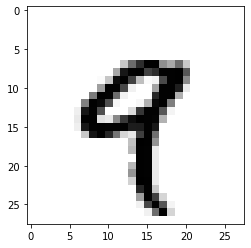

In [35]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#network architecture

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()      #sequential tpye model we are using

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))   #->784 input to 512 nodes middle..activation function
network.add(layers.Dense(10, activation='softmax')) #input is output of previous layer, output 10
#activation func.. convert from linear to nonlinear
#softmax will give an array(vector) of 10 values/probabilies of what the number could be, hightest prob will the the output

In [37]:
import numpy as np

In [38]:
a = np.array([28*28])
a.ndim

1

#compiling a network. lossfunction, optimizer,metrics

In [39]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #accuracy=correct/total

(machine learning with tensoreflow) chapter 4

for metric function 1.accuracy 2.precision 3.recall

overall correctness of the model -> accuracy
which are correct and not correct? those which are wrong why are they wrong?
accuracy measure does not give this breakdown
use //confusion matrix...

those that are incorrectly predicted as positive are called falsepositive(FP)
those that are correctly predicted as positive are called truepositive(TP)
if algo predicts an element to be negative but it is positive its called (FN) false negative 
false class called false (TN)

(((((((((IMP)))))))))
Precision 
precision=TP/TP+FP
Recall
recall=TP/TP+FN

In [40]:
#input shape is 784 vector, trainimages is a 3d tensor so things wont work outso before fit we do
#scale down in a way data is changed to 0s and 1s.  for this divide whole data with the biggest value in data
#why scaling? to decrease in variation of digits
train_images = train_images.reshape((60000, 28 * 28)) #convert3d to 2d from (60000,28,28) to (60000,784)train_images = train_images.astype('float32') / 255
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [41]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
train_images[0]   #made to be a vector    #rows of 2d concat to make 1d vector

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

labels are numbers rn, we have to send these as names not numbers so no operation can be performed on it. data is of 2 types (1)ordinal (2)nominal->data that cant have quantitave comparision for eg apples cant be arranged in descending order

0 1 2 3 4 5 6 7 8 9(this is ordinal convert to nominal)

In [43]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [44]:
train_labels[0] # -> 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
train_labels[1] # -> 0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
network.fit(train_images, train_labels, epochs=20, batch_size=128) # data goes in netwrk/ processes/traverses 5 times.

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0293 - accuracy: 0.9916
Epoch 2/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0228 - accuracy: 0.9932
Epoch 3/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0172 - accuracy: 0.9951
Epoch 4/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0137 - accuracy: 0.9960
Epoch 5/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0101 - accuracy: 0.9972
Epoch 6/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0076 - accuracy: 0.9979
Epoch 7/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0062 - accuracy: 0.9985
Epoch 8/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0049 - accuracy: 0.9987s - loss: 0.0048 - accuracy: 0.99
Epoch 9/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0038 

#why loss and accuracy during training?
when recieved first image(0), it learns pattern matching with label, after initial learning it tests itselfwe are just giving images.
#everything we run more epoch ccuracy gets better... bc its testing/learning on same data its not new to the network

In [49]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc: 0.9829


In [50]:
#if performance has gap , the difference between trainging accuracy and testing acc is called overfitting
#why did accuracy decrease
#network has an optimal point. every time epoch filters data, its already learnt relevant features.
   #if we increase epoch it changes its ability of relevant learning.

In [ ]:
#stopping our model at its best accuracy level so it doesnt go thru further learning